In [1]:
import illustris_python.groupcat as gc
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import h5py
import study_pairs_abacus as spa
%matplotlib inline
plt.style.use('astroandes.mplstyle')

In [2]:
BoxID = 18
data = spa.load_box(BoxID=BoxID)
vlim = {'mean':627, 'sigma':22}

Finished reading ../data/pairs_box_18.hdf5


In [77]:
data.keys()

dict_keys(['vel_A_mag', 'vel_B_mag', 'pos_AB', 'vel_AB', 'vel_AB_rad', 'vel_AB_tan', 'vmax_A', 'vmax_B', 'vel_G_mag', 'vmax_G'])

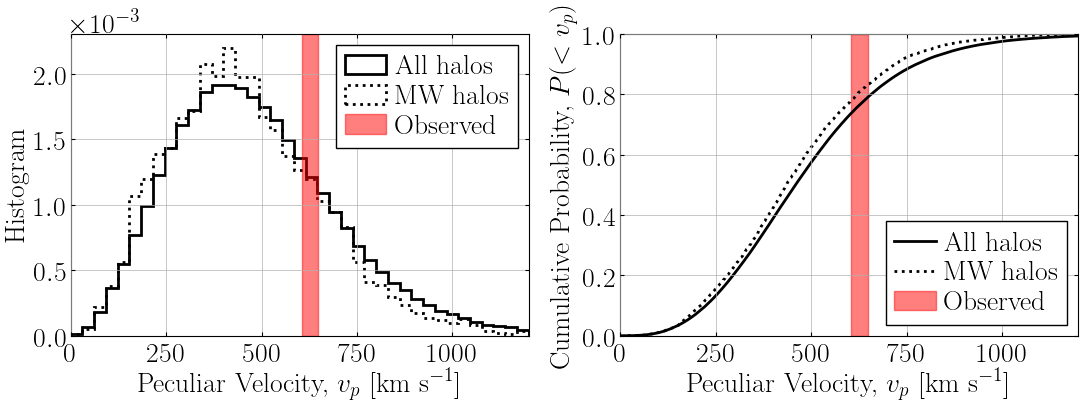

In [79]:
ii = (data['vmax_A']<240) & (data['vmax_B']<240)
ll = (data['vmax_G']<240)
plt.figure(figsize=(13,4))

ax = plt.subplot(1,2,1)
ax.ticklabel_format(style='sci', scilimits=(0,5))

plt.hist(data['vel_G_mag'][ll], 
         bins=np.linspace(0,1200,40), 
         density=True, histtype='step', color='black', label='All halos',
         linestyle='-', linewidth=2)
plt.hist(data['vel_B_mag'][ii], 
         bins=np.linspace(0,1200,40),
         density=True, histtype='step', color='black', label='MW halos',
         linestyle=':', linewidth=2)
plt.axvspan(vlim['mean']-vlim['sigma'], vlim['mean']+vlim['sigma'], 
            alpha=0.5, color='red', label='Observed')
plt.legend()
plt.xlim([0,1200])
plt.grid(linewidth=0.5)

plt.xlabel("Peculiar Velocity, $v_p$ [km s$^{-1}$]")
plt.ylabel("Histogram")

plt.subplot(1,2,2)

plt.axvspan(vlim['mean']-vlim['sigma'], vlim['mean']+vlim['sigma'], 
            alpha=0.5, color='red', label='Observed')
plt.plot(np.sort(data['vel_G_mag'][ll]), 
         np.linspace(0,1,np.count_nonzero(ll)), 
         linestyle='-', color='black', label='All halos')
plt.plot(np.sort(data['vel_B_mag'][ii]), 
         np.linspace(0,1,np.count_nonzero(ii)), 
         linestyle=':', color='black', label='MW halos')

plt.legend()
plt.xlim([0,1200])
plt.ylim([0,1])
plt.grid(linewidth=0.5)
plt.xlabel('Peculiar Velocity, $v_p$ [km s$^{-1}$]')
plt.ylabel("Cumulative Probability, $P(<v_p)$")

plt.savefig("../paper/cumulative_probability_{:02d}.pdf".format(BoxID),  bbox_inches="tight")